<a href="https://colab.research.google.com/github/17092003vamsi/HUNTER/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Accuracy: 0.95
Validation Accuracy: 0.95


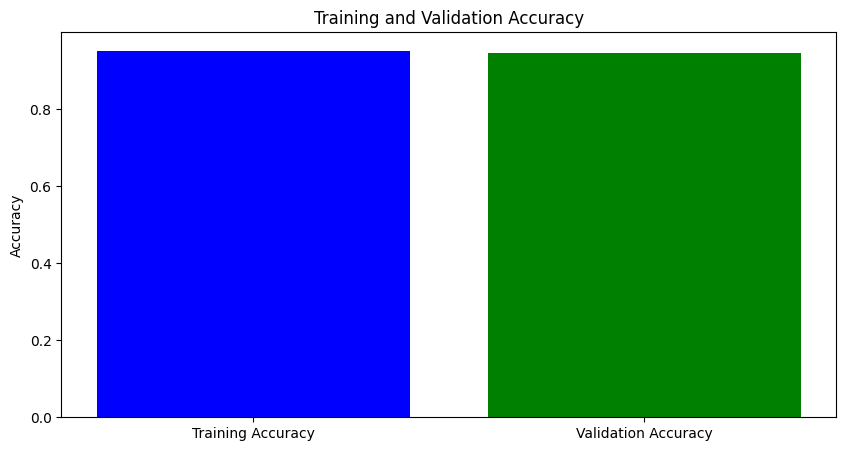

<Figure size 800x800 with 0 Axes>

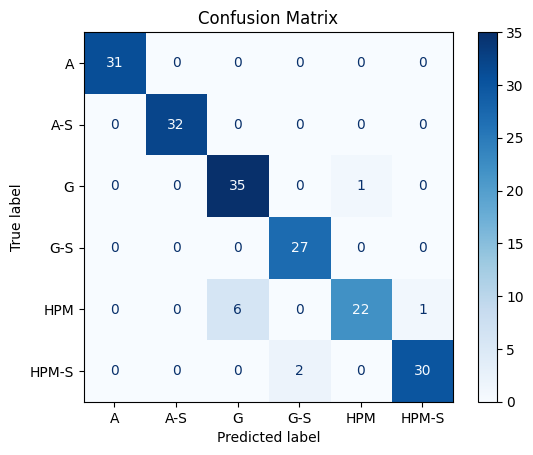

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the data
file_path = '/content/project 2 sap.csv'  # replace with the correct path to your CSV file
data = pd.read_csv(file_path)

# Separate features and target label
X = data.drop(columns=['Type', 'Lable'])
y = data['Lable']

# Handle missing values by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target labels into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and accuracy for both training and validation sets
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print Training and Validation Accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_accuracy, val_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

# Plotting Confusion Matrix with adjusted labels
unique_labels = np.unique(np.concatenate((y_val, y_val_pred)))
conf_matrix = confusion_matrix(y_val, y_val_pred, labels=unique_labels)

plt.figure(figsize=(8, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.inverse_transform(unique_labels))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
